In [1]:


import networkx as nx
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import py3Dmol
from IPython.display import display



In [2]:

def draw_with_spheres(mol):
    v = py3Dmol.view(width=300,height=300)
    mol_block = Chem.MolToMolBlock(mol)
    v.addModel(mol_block, "mol")
    v.zoomTo()
    v.setStyle({'sphere':{'radius':0.3},'stick':{'radius':0.2}})
    v.show()

### Step 1 of 5: DFS sample example

In [2]:

def visualize_dfs_traversal(mol, tree, order):
    print("Visualizing DFS Traversal:")
    G = nx.Graph(tree)
    
    if len(G.nodes) == 0:
        print("Error: The tree is empty. There's nothing to visualize.")
        return
    
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    
    edge_labels = {}
    node_colors = ['lightblue' for _ in G.nodes()]
    edge_colors = ['black' for _ in G.edges()]
    
    print("DFS Traversal steps:")
    for i, (u, v, direction) in enumerate(order):
        print(f"Step {i+1}: {'Child' if direction == 1 else 'Parent'} edge ({u}, {v})")
        
        if v is not None:
            if direction == 1:
                edge_labels[(u, v)] = f"{i+1}"
                edge_colors[list(G.edges()).index((u, v))] = 'r'  # Color the current edge red
            node_colors[u] = 'yellow'  # Highlight current node
            if v in G.nodes():
                node_colors[v] = 'green'  # Highlight next node
            
            plt.clf()
            nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, edge_color=edge_colors)
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
            plt.title(f"Step {i+1}: {'Child' if direction == 1 else 'Parent'} edge ({u}, {v})")
            plt.pause(0.5)
        
        # Reset colors for the next iteration
        node_colors = ['lightblue' for _ in G.nodes()]
        edge_colors = ['black' for _ in G.edges()]
    
    print("\nFinal DFS Traversal order:", order)
    plt.show()

Visualizing DFS Traversal:
DFS Traversal steps:
Step 1: Child edge (0, 1)


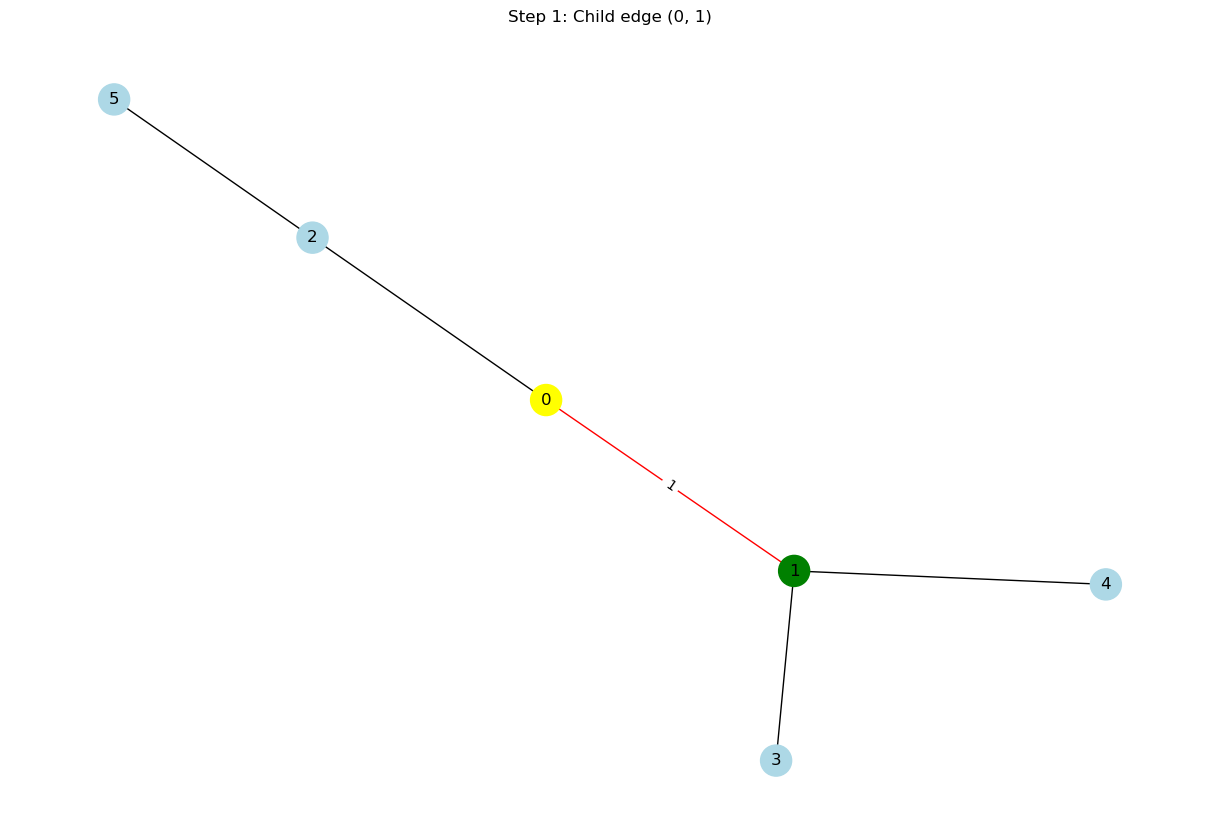

Step 2: Child edge (1, 3)


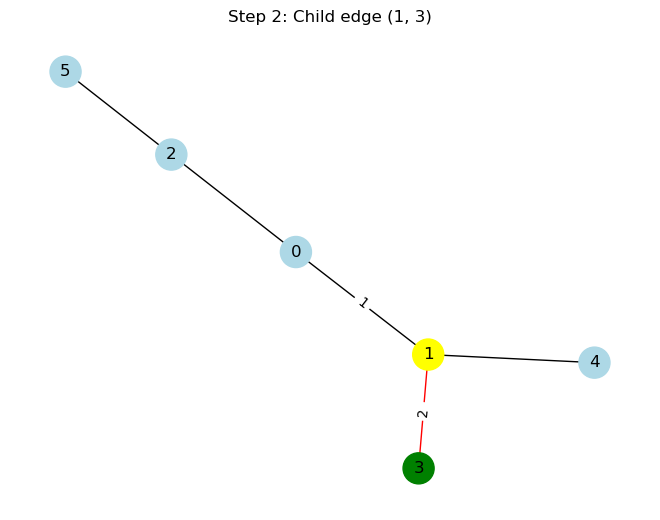

Step 3: Parent edge (3, 1)


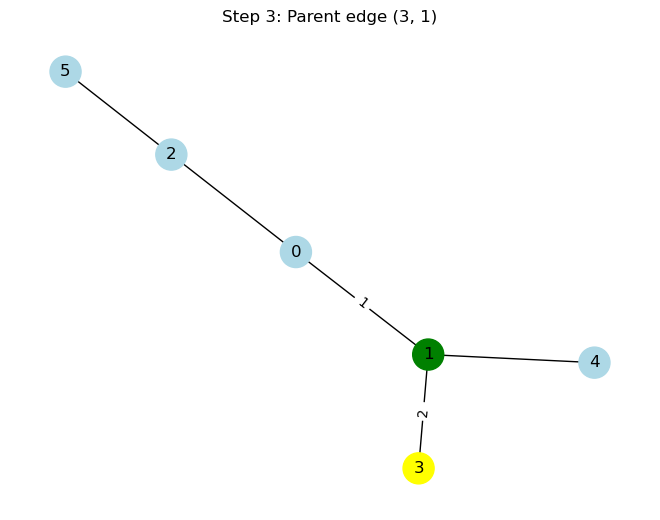

Step 4: Child edge (1, 4)


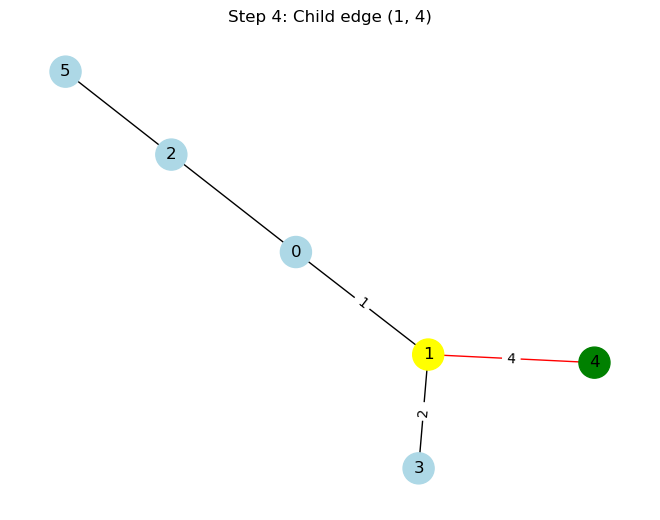

Step 5: Parent edge (4, 1)


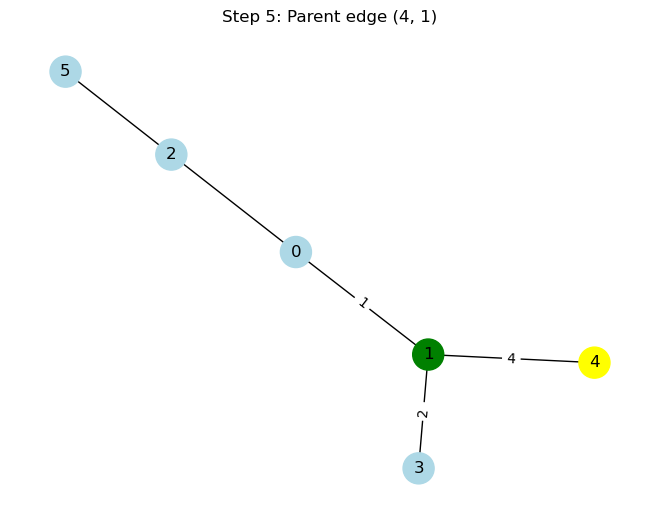

Step 6: Parent edge (1, 0)


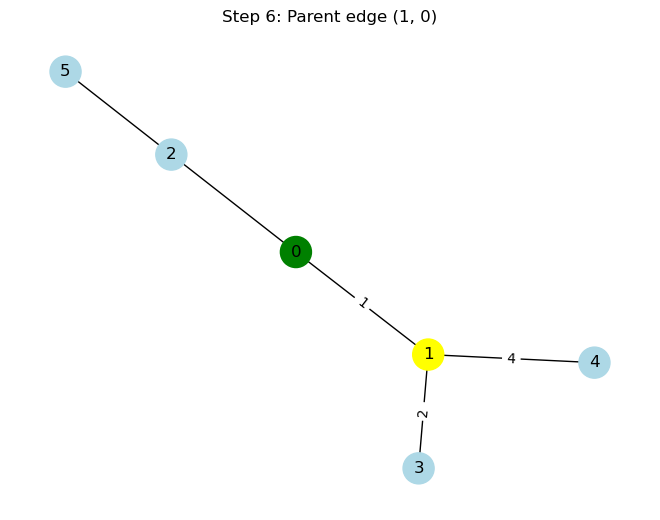

Step 7: Child edge (0, 2)


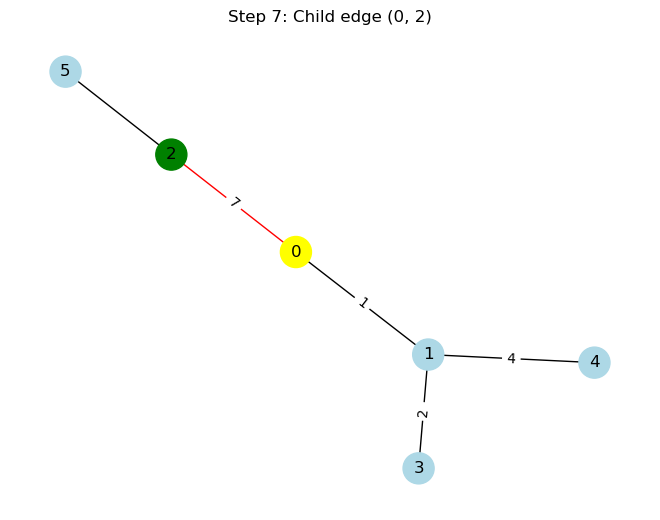

Step 8: Child edge (2, 5)


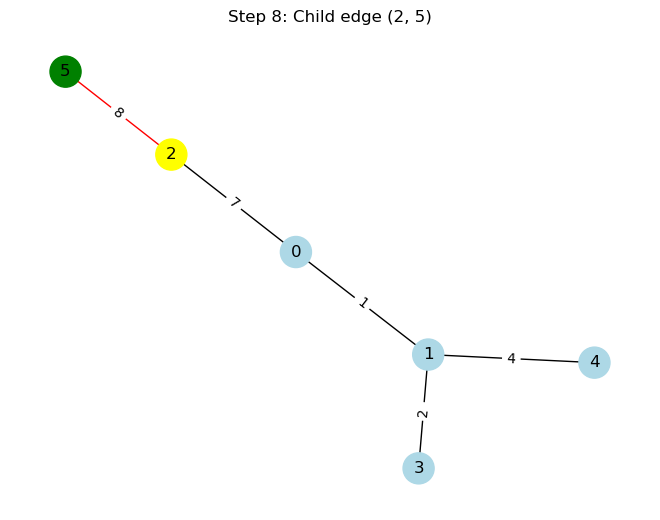

Step 9: Parent edge (5, 2)


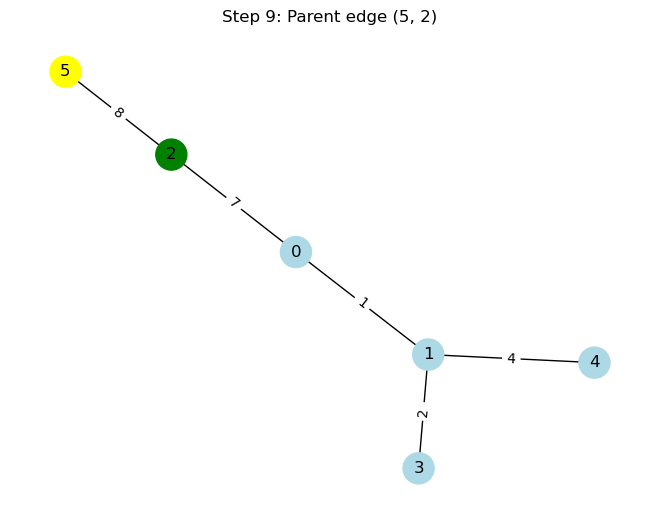

Step 10: Parent edge (2, 0)


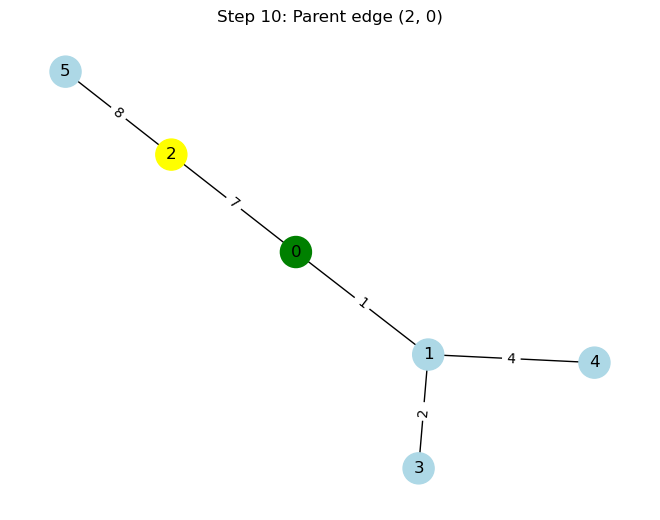


Final DFS Traversal order: [(0, 1, 1), (1, 3, 1), (3, 1, 0), (1, 4, 1), (4, 1, 0), (1, 0, 0), (0, 2, 1), (2, 5, 1), (5, 2, 0), (2, 0, 0)]


In [3]:
tree = nx.Graph()
tree.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Sample DFS order
order = [(0, 1, 1), (1, 3, 1), (3, 1, 0), (1, 4, 1), (4, 1, 0), (1, 0, 0), (0, 2, 1), (2, 5, 1), (5, 2, 0), (2, 0, 0)]

visualize_dfs_traversal(None, tree, order)  # Pass None for mol as it's not used in this function

#### Understanding `is_anchor()`

In [4]:
idxfunc = lambda a : a.GetAtomMapNum() - 1

def is_anchor(atom, inter_atoms):
    for a in atom.GetNeighbors():
        if idxfunc(a) not in inter_atoms:
            return True
    return False

In [5]:
from rdkit import Chem

# Create a simple molecule
mol = Chem.MolFromSmiles("CCO")

# Check if the middle carbon is an anchor
middle_atom = mol.GetAtomWithIdx(1)
is_anchor_atom = is_anchor(middle_atom, {0, 1})  # inter_atoms are the CC part

print(is_anchor_atom)  # Should print True because it's connected to the O

True


In [15]:
from hgraph.chemutils import get_inter_label

from rdkit import Chem

# Create a simple molecule
mol = Chem.MolFromSmiles("CCO")

# Get inter label for the CC part
# new_mol, inter_label = get_inter_label(mol, [0, 1], {1})
new_mol, inter_label = get_inter_label(mol, [2], {1})

print(Chem.MolToSmiles(new_mol))  # Should print "CC"
print(inter_label)  # Should print something like [(1, 'C[CH2]')]

O
[(1, 'O')]





```python
119: Chem.MolToSmiles(mol)
'[CH3:1][S:2][C:3]1=[CH:4][CH:5]=[CH:6][CH:7]=[C:8]1[C:9](=[O:10])[NH:11][C:12]1=[CH:13][CH:14]=[C:15]2[C:16](=[CH:17]1)[O:18][CH2:19][CH2:20][O:21]2'


120: Chem.MolToSmiles(mol)
'[SH:2][C:3]1=[CH:4][CH:5]=[CH:6][CH:7]=[CH:8]1'
atom_map
[1, 2, 3, 4, 5, 6, 7]

122: Chem.MolToSmiles(mol)
'SC1=CC=CC=C1'
123: list(rank)
[0, 6, 5, 2, 1, 3, 4]
124: rank
{1: 0, 2: 6, 3: 5, 4: 2, 5: 1, 6: 3, 7: 4}

Chem.MolToSmiles(mol)
'SC1=CC=CC=C1'
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetSymbol()} (index {atom.GetIdx()}): Rank {rank[atom.GetIdx()]}")
Atom S (index 0): Rank 0
Atom C (index 1): Rank 6
Atom C (index 2): Rank 5
Atom C (index 3): Rank 2
Atom C (index 4): Rank 1
Atom C (index 5): Rank 3
Atom C (index 6): Rank 4



```

In [3]:
mol = Chem.MolFromSmiles("SC1=CC=CC=C1")
# visualize
draw_with_spheres(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

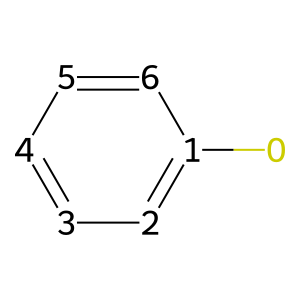

Atom S (index 0)
Atom C (index 1)
Atom C (index 2)
Atom C (index 3)
Atom C (index 4)
Atom C (index 5)
Atom C (index 6)


In [6]:
AllChem.Compute2DCoords(mol)

mol_with_indices = Chem.Mol(mol)

for atom in mol_with_indices.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

img = Draw.MolToImage(mol_with_indices, size=(300, 300))

display(img)

for atom in mol.GetAtoms():
    print(f"Atom {atom.GetSymbol()} (index {atom.GetIdx()})")

Atom C (index 0): Rank 0
Atom C (index 1): Rank 2
Atom O (index 2): Rank 1


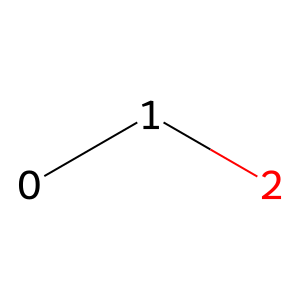

In [12]:
mol = Chem.MolFromSmiles("CCO")

# Get canonical ranking
rank = Chem.CanonicalRankAtoms(mol, breakTies=False)

# Print atom symbols and their ranks
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetSymbol()} (index {atom.GetIdx()}): Rank {rank[atom.GetIdx()]}")


AllChem.Compute2DCoords(mol)

mol_with_indices = Chem.Mol(mol)

for atom in mol_with_indices.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

img = Draw.MolToImage(mol_with_indices, size=(300, 300))

display(img)

Atom C (index 0): Rank 0
Atom C (index 1): Rank 4
Atom C (index 2): Rank 0
Atom C (index 3): Rank 0
Atom C (index 4): Rank 0


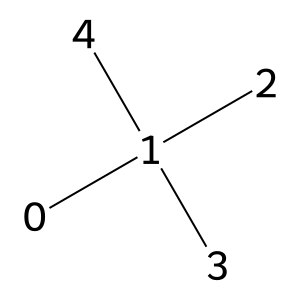

In [13]:
mol = Chem.MolFromSmiles("CC(C)(C)C")

# Get canonical ranking
rank = Chem.CanonicalRankAtoms(mol, breakTies=False)

# Print atom symbols and their ranks
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetSymbol()} (index {atom.GetIdx()}): Rank {rank[atom.GetIdx()]}")


AllChem.Compute2DCoords(mol)

mol_with_indices = Chem.Mol(mol)

for atom in mol_with_indices.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

img = Draw.MolToImage(mol_with_indices, size=(300, 300))

display(img)

[0, 2, 0, 2]
Atom C (index 0): Rank 0
Atom N (index 1): Rank 2
Atom C (index 2): Rank 0
Atom N (index 3): Rank 2


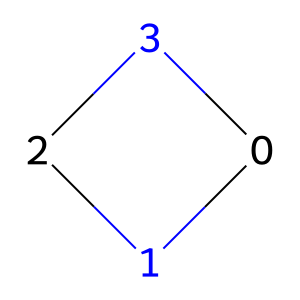

In [14]:


mol = Chem.MolFromSmiles('C1NCN1')
print(list(Chem.CanonicalRankAtoms(mol, breakTies=False)))


rank = Chem.CanonicalRankAtoms(mol, breakTies=False)

for atom in mol.GetAtoms():
    print(f"Atom {atom.GetSymbol()} (index {atom.GetIdx()}): Rank {rank[atom.GetIdx()]}")


AllChem.Compute2DCoords(mol)

mol_with_indices = Chem.Mol(mol)

for atom in mol_with_indices.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

img = Draw.MolToImage(mol_with_indices, size=(300, 300))

display(img)